# Overview

The topic of this session is solving _initial value problems_ (IVPs). An IVP is an ordinary differential equation with an initial condition:

$
\begin{align}
{dy \over dt} &= f(t, y) \nonumber\\
y(t_0) &= y_0 \nonumber
\end{align}
$

The time $t_0 \in \mathbb{R}$ is referred to as the _initial time_ and $y_0 \in \mathbb{R}^n$ is the _initial state_. The function $f \colon \mathbb{R} \times \mathbb{R}^n \to \mathbb{R}^n$ is referred to as the _right-hand side_ (RHS) and it defines the differential equation system.

_Remark_: The equation written above is first-order in time; an ODE with a higher-order derivative in time can be rewritten to be first-order in time by appending extra variables to represent higher-order derivatives. This means that any method that's able to solve a first-order IVP will also be able to solve any higher-order IVP, so we restrict our attention to solving first-order IVPs.

**Exercise**: convince yourself of the above fact

The goal in solving an IVP is to obtain the value of the solution $y(t)$ for all values of $t$ up to a specified end point, $t_f$. The general approach taken when solving IVPs on a computer is to discretize time, i.e. to take a large but finite collection of time steps $(t_0, t_1, \dots, t_f)$ and estimate the solution value at these points, i.e. $\{y_i = y(t_i)\}$

# Methods

We now give a brief overview of some numerical methods for solving IVPs

## Forward Euler method
This is conceptually the simplest method available for solving IVPs numerically. The idea is to use the last estimated system state and the known right-hand side to estimate the slope of the solution curve, and then to use that slope to estimate the solution at the next time step. In formulas:

$ {y_{n+1} - y_n \over t_{n+1} - t_n} = f(t_n, y_n)  \implies y_{n+1} = y_n+ (t_{n+1}-t_{n}) f(t_n, y_n)$

The left-most expression above is a numerical estimate of the time derivative $dy/dt$ at time $t_n$, and the differential equation specifies that this should be equal to $f(t_n, y_n)$. This gives the simple update formula on the right.


## Implicit methods: Backward Euler
The methods mentioned above are _explicit_, meaning that the next estimate is given explicitly as a function of the previously estiamted states (and time steps). There are other methods that are _implicit_, meaning that the value of the next estimate is not given by a formula, but rather it enters into an equation that must be solved numerically.

The simplest implicit method is the so-called Backward Euler Method. 
${y_{n+1} - y_n \over t_{n+1} - t_n} = f(t_{n+1}, y_{n+1})$

As for the Forward Euler Method, on the left is an estimate of the derivative $dy/dt$, but here that derivative is set equal to the right-hand side evaluated at the _new_ $y$-value.

Implicit methods can be more computationally intensive than explicit methods, but they can also be advantageous when dealing with so-called "stiff" equations, which can require prohibitively small time steps to get acceptably small error under an explicit scheme.

## Runge-Kutta methods

Runge-Kutta (RK) methods are a family of methods that make several intermediate approximations to the derivative of the solution near the most recent time $t_n$ to arrive at a much more accurate estimate of $y_{n+1}$ than is obtained by the Euler schemes. These are some of the most common methods used by numerical integration packages such as `scipy` and are a good method to try first. There are, however, situations where other integrators are called for, in particular when the right-hand side $f(t, y)$ changes very quickly with respect to $y$. We will not discuss the details of RK methods in this class.

# Exercises


In [8]:
# Exercise 1
# Below is a function definition with docstring. Complete the code defining the function
# Use only built-in Python functions and numpy

import numpy as np

def forward_euler(fun, y0, t0, tf, dt):
    """
    Integrates the equation dy/dt = fun(t, y) from t=t0 to t=tf using the forward Euler method

    INPUT:
        fun : callable function with signature fun(t, y), where t is a scalar and y is a numpy array of size (n,)
        y0 : numpy array of size (n,) giving the initial condition
        t0 : float giving the initial time
        tf : float giving the desired final time
        dt : desired time step

    OUTPUT:
        t : numpy array of shape (m,) giving the time points at which the solution is estimated
            (m should satisfy m*dt = tf-t0)
        y : numpy array of shape (n, m) where m is the number of time steps
    """
    # compute evaluation time points
    t = np.arange(t0, tf, dt)
    # compute size of output array
    m = len(t)
    n = len(y0)
    # preallocate output array
    y = np.zeros((n, m))
    # insert initial condition
    y[:, 0] = y0
    # now compute euler step
    # y(t+dt) = ???
    for i in range(1, m):
        y[:, i] = y[:, i-1] + dt * fun(t, y[:, i-1])
    return t, y

In [19]:
# Test your integrator!

def sho_rhs(t, y):
    # the right-hand side of the simple harmonic oscillator
    return np.array([[0, 1],[-1, 0]])@y

y0 = np.array([1,0])
t0 = 0
tf = 20
dt = 0.01

t, y = forward_euler(sho_rhs, y0, t0, tf, dt)

In [20]:
# compute the solution using scipy's solve_ivp
from scipy.integrate import solve_ivp
out = solve_ivp(sho_rhs, (t0, tf), y0, t_eval = np.arange(t0, tf, dt))

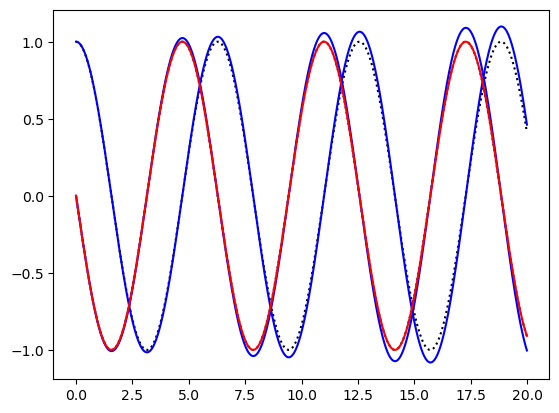

In [21]:
# compare by plotting
import matplotlib.pyplot as plt

plt.plot(out.t, out.y.T, 'k:')
plt.plot(t, y.T, 'b')
plt.plot(t, -np.sin(t), 'r')

# Stiffness

As mentioned above, some equations have a property known as "stiffness", which is difficult to characterize precisely but generally means that the solution exhibits very fast transient behavior before settling down onto an attractor. The issue with an explicit integration scheme applied to such a system is that during the fast transient phase, it will overestimate the size of step it should take and end up overshooting the attractor where the solution actually ends up. Below you will deal with such a system and try out different methods to see how they perform.

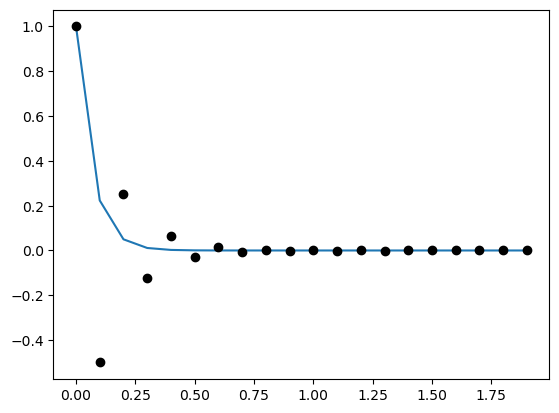

In [30]:
# Example 1: Fast exponential decay

fast_exp_lhs = lambda t, x : -15*x
# equivalent to
def fast_exp_lhs(t, x):
    return -15*x

y0 = np.array([1])
t0 = 0
tf = 2
dt = 0.1

t, y_fwd_euler = forward_euler(fast_exp_lhs, y0, t0, tf, dt)
out = solve_ivp(fast_exp_lhs, (t0, tf), y0, t_eval = np.arange(t0, tf, dt))
# plot
plt.plot(out.t, out.y[0])
plt.plot(t, y_fwd_euler[0], 'ko')

# try solving with different values of dt
# try also writing a backward euler function for this specific function (will require some math)


In [69]:
# Example 2 : Stiff van der pol system
# the system becomes more stiff as you increase the parameter mu
# test out your integrator's ability to solve this IVP

def stiff_van_der_pol(t, y, mu=100):
    y1, y2 = y
    dy1 = y2
    dy2 = mu*(1-y1**2)*y2 - y1
    return np.array([dy1, dy2])

y0 = np.array([2, 0])
t0 = 0
tf = 50
dt = 0.01


mu = 1
rhs = lambda t, y : stiff_van_der_pol(t, y, mu)

t, y = forward_euler(rhs, y0, t0, tf, dt)

C:\Users\jordan\AppData\Local\Temp\ipykernel_15844\3522075047.py:9: RuntimeWarning: overflow encountered in scalar multiply
  dy2 = mu*(1-y1**2)*y2 - y1
C:\Users\jordan\AppData\Local\Temp\ipykernel_15844\3522075047.py:9: RuntimeWarning: overflow encountered in scalar power
  dy2 = mu*(1-y1**2)*y2 - y1
C:\Users\jordan\AppData\Local\Temp\ipykernel_15844\64818008.py:35: RuntimeWarning: invalid value encountered in add
  y[:, i] = y[:, i-1] + dt * fun(t, y[:, i-1])


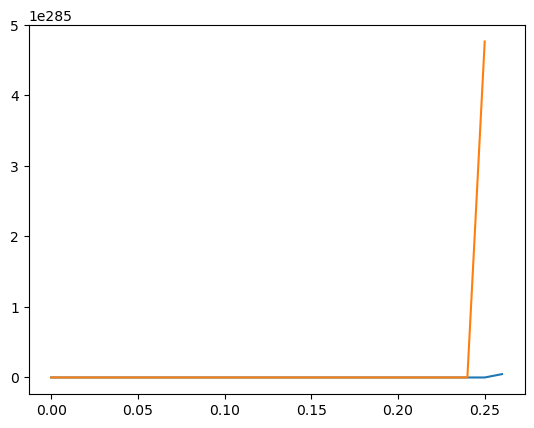

In [68]:
plt.plot(t, y.T)

Text(0, 0.5, 'dy/dt')

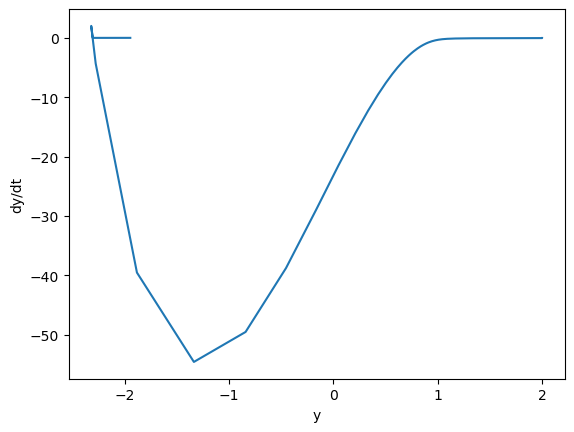

In [65]:
plt.plot(y[0], y[1])
plt.xlabel('y')
plt.ylabel('dy/dt')

# Parameters

It's often the case that an ODE model has one or more adjustable parameters that can significantly change the properties of the solution. It's therefore useful to have ways to manipulate paramter values in code. Below we show an example of such a case with the Lorenz system

In [70]:
# this function takes three parameters: sigma, beta, and rho.
def lorenz_rhs(t, y, sigma, rho, beta):
    X, Y, Z = y
    return np.array([sigma*(Y-X), X*(rho - Z) - Y, X*Y - beta*Z])

In [71]:
# the right-hand side function needs parameter values, which we can pass via the IVP solver with the keyword 'args'
# the values below are those originally considered by lorenz
args = (10, 28, 8/3)
tf = 50
Nt = 5000
out = solve_ivp(lorenz_rhs, (0, tf), np.array([1.,2.,3.]), t_eval = np.linspace(0, tf, Nt), args = args)

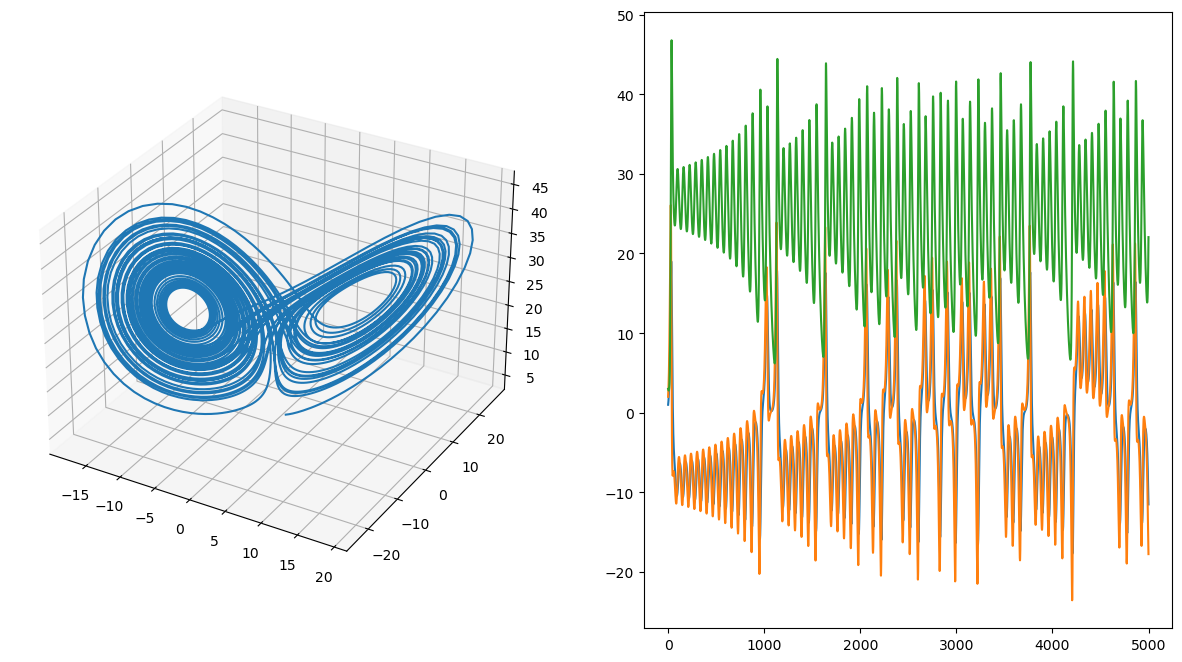

In [76]:
# visualize the dynamics by plotting the trajectories of X, Y, and Z
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot(out.y[0], out.y[1], out.y[2])
plt.subplot(122)
plt.plot(out.y.T)

In [82]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame({'x':out.y[0], 'y':out.y[1], 'z':out.y[2]})
fig = px.line_3d(df, x='x', y='y', z='z')
fig.write_html('lorenz_attractor.html')

In [73]:
# if this doesn't work you may need to install ipympl: https://matplotlib.org/ipympl/index.html
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

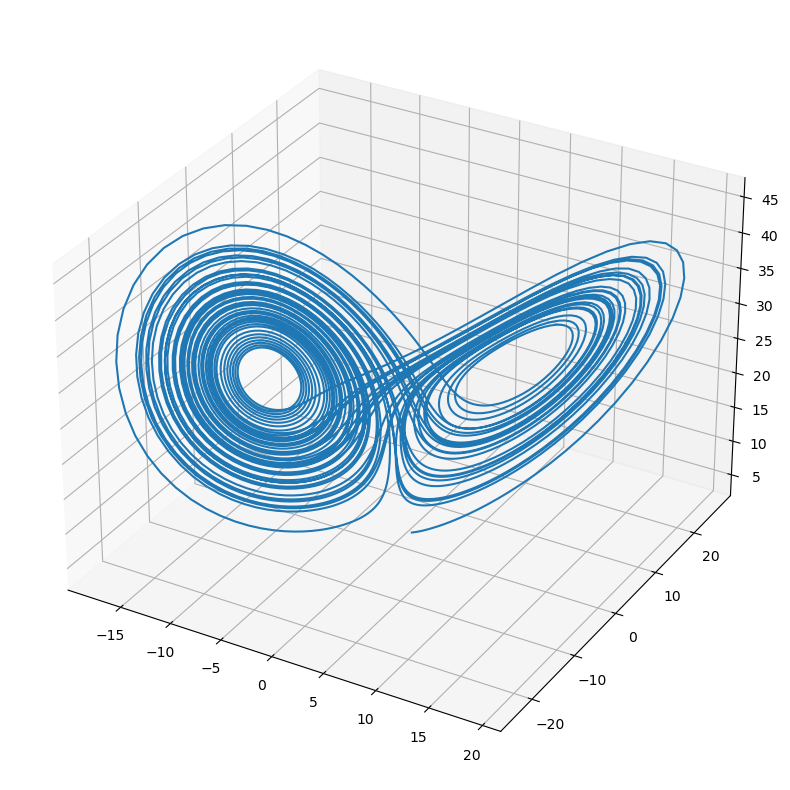

In [74]:
# an alternative way to visualize the dynamics is to plot its trajectory in 3D. This is possible with matplotlib (also plotly and other visualization packages)
# there are ways to make these plots interactive, but they are platform dependent
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(out.y[0], out.y[1], out.y[2])

## Explore!

For the last part, use numerical IVP solvers to explore a system of 2 ODEs that describe a predator-prey system:
$$
\begin{align}
{dx \over dt} &= x(1-{x\over K}) - y {x\over 1+x}\\
{dy \over dt} &= \delta y {x\over 1+x} - \gamma y
\end{align}
$$
where $x$ represents the abundance of a prey species and $y$ represents the abundance of a predator species. The prey undergo logistic growth with carrying capacity $K$ and are preyed upon by predators at a rate proportional to $1/(1+x)$. Predators multiply in proportion to the predation rate and die at a constant rate $\gamma$

**Exercise**: Write a python function that computes the right-hand side of this ODE and explore the behavior of its solutions using `solve_ivp`. Can you identify a bifurcation as you vary the parameters $\delta, \gamma$, and $K$?

In [162]:
def predator_prey(t, X, delta, gamma, K):
    x, y = X
    return np.array([x*(1-x/K) - y*x/(1+x), delta*y*x/(1+x) - gamma*y])

def solve_and_plot(args, tf=100, Nt=1000, x0 = np.array([1, 1])):
    t_eval = np.linspace(0, tf, Nt)
    out = solve_ivp(predator_prey, (t0, tf), x0, t_eval = t_eval, args = args, atol = 1e-12, method='Radau')

    fig = plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.plot(out.t, out.y[0], label='prey')
    plt.plot(out.t, out.y[1], label='predator')
    plt.legend()
    plt.subplot(122)
    plt.plot(out.y[0], out.y[1])
    plt.xlabel('prey')
    plt.ylabel('predator')
    return fig, out

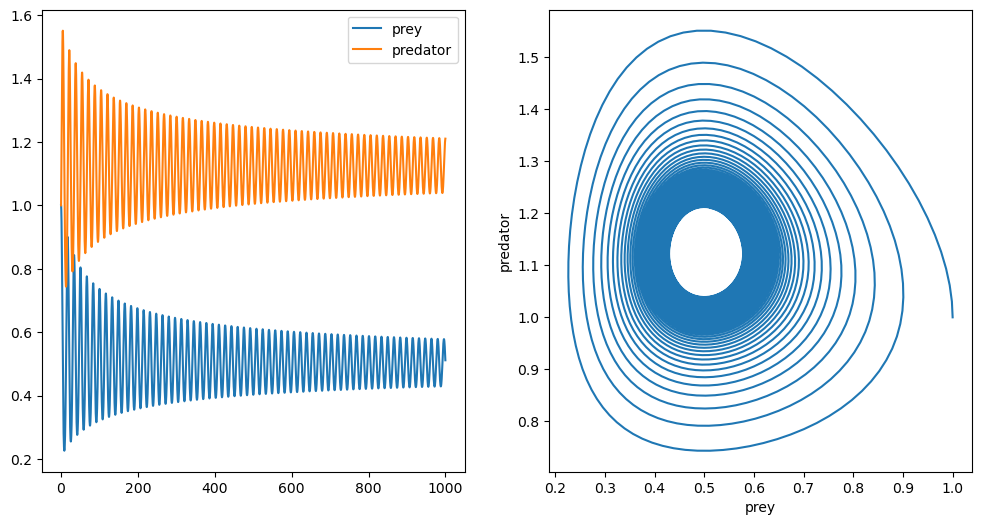

In [163]:
args = (0.9, 0.3, 2)
fig, out = solve_and_plot(args, tf = 1000, Nt=5000, x0 = np.array([1, 1]));
ax = fig.get_axes()

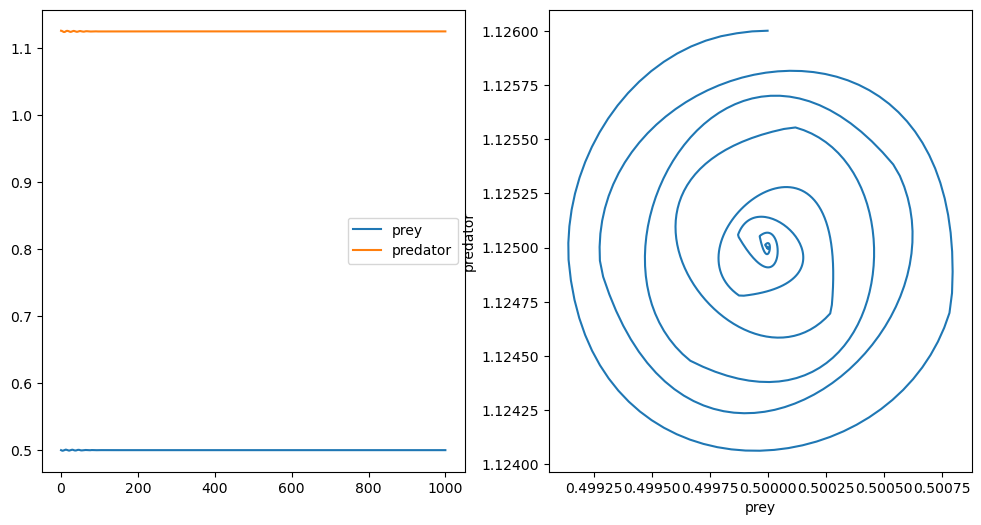

In [174]:
args = (0.9, 0.3, 2)
fig, out = solve_and_plot(args, tf = 1000, Nt=5000, x0 = np.array([0.5, 1.126]));
ax = fig.get_axes()

In [183]:
def Jacobian(x, y, delta, gamma, K):
    return np.array([[1-2*x/K-y*x/(1+x)**2 - y/(1+x), -x/(1+x)],
                    [-delta*x*y/(1+x)**2+delta*y/(1+x), delta*x/(1+x) - gamma]])
J = Jacobian(0.5, 1.125, *args)

In [176]:
from sympy import *
x, y = symbols('x y')
delta, gamma, K = symbols('delta gamma K')
dxdt = x*(1-x/K) - y*x/(1+x)
dydt = delta*y*x/(1+x) - gamma*y

In [182]:
diff(dydt, x)

-delta*x*y/(x + 1)**2 + delta*y/(x + 1)

In [184]:
np.linalg.eigvals(J)

array([-0.25+0.29580399j, -0.25-0.29580399j])